In [37]:
%matplotlib inline

import dwarf as dw
import cgs as cgs
import yt
import numpy as np
from initial_conditions import profiles as prof
from initial_conditions import ic_list as icl
from analytic_model import dwarf_model as dwm

import matplotlib.pyplot as plt

from scipy.misc import derivative

In [38]:
def _acc(field, data):
    try:
        ax = data[('flash', 'accx')].value
        ay = data[('flash', 'accy')].value
        az =data[('flash', 'accz')].value
    
        ar = np.sqrt( ax*ax + ay*ay + az*az)
    
        ar = ar * yt.units.cm / yt.units.s / yt.units.s
    except:
        ar = data['density'].value
        ar = ar * yt.units.cm / yt.units.s / yt.units.s
    
    return ar

yt.add_field('acc_r', function=_acc, units="cm/s**2")

yt : [WARNING  ] 2015-10-18 09:22:14,341 Field ('gas', 'acc_r') already exists. To override use force_override=True.


In [39]:
def g_B(r, r_s, M200, rho_crit):
    
    R200 = (3.0*M200/(4.0*np.pi*200.0*rho_crit))**(1.0/3.0)

    
    x = R200 / r_s    
    rho_o = 3.0 * M200 / (4.0 * np.pi * r_s**3) / (1.5*(np.log(1.0+x) + 0.5*np.log(1.0+x*x) - np.arctan(x)))

    C_phi = 4.0 * np.pi * cgs.G * rho_o * r_s**2

    
    x = r / r_s

    g = - (0.5*C_phi/r_s) * ((-1.0/x**2) * (0.5*np.log(1+x*x) + np.log(1+x) - np.arctan(x))+\
                       (1.0 / x  ) * (x/(1+x*x) + 1.0/(1.0+x) - 1.0/(1.0+x*x))+\
                                     (1.0/(1.0+x) - x/(1.0+x*x) - 1.0/(1.0+x*x)))
    
    return g

In [40]:
#LT = dwm.analytical_dwarf('Leo_T_Burkert', ic.ic)


In [41]:
ds_dir = "./../flash_runs/leo_T/Burkert_SN_LT_Mn150_v4_nh4/0000_cfloor_global/"
dwarf = dw.simulation('dwarf_fullp_hdf5_', ds_dir = ds_dir)

yt : [WARNING  ] 2015-10-18 09:22:14,700 Field ('gas', 'SNR') already exists. To override use force_override=True.
yt : [INFO     ] 2015-10-18 09:22:14,763 integer runtime parameter checkpointfilenumber overwrites a simulation scalar of the same name
yt : [INFO     ] 2015-10-18 09:22:14,790 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-18 09:22:14,790 Parameters: domain_dimensions         = [128  64  64]
yt : [INFO     ] 2015-10-18 09:22:14,791 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-18 09:22:14,792 Parameters: domain_right_edge         = [  6.17135516e+22   3.08567758e+22   3.08567758e+22]
yt : [INFO     ] 2015-10-18 09:22:14,793 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-18 09:22:15,535 Loading field plugins.
yt : [INFO     ] 2015-10-18 09:22:15,536 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-18 09:22:15,537 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-18 09:22:15,538 

DWARF ANALYSIS : [INIT] Did not find parameter: sim_rhoCloud
DWARF ANALYSIS : [INIT] Did not find parameter: sim_rho1rm
DWARF ANALYSIS : [INIT] Did not find parameter: sim_rho2rm
DWARF ANALYSIS : [INIT] Did not find parameter: sim_rhoRL
DWARF ANALYSIS : [INIT] Did not find parameter: sim_pAmbient
DWARF ANALYSIS : [INIT] Did not find parameter: sim_RL
DWARF ANALYSIS : [INIT] Did not find parameter: sim_rScale
DWARF ANALYSIS : [INIT] Did not find parameter: particleFileIntervalTime
DWARF ANALYSIS : [INIT] Looking for supernova files
DWARF ANALYSIS : [INIT] No supernova feedback file found at ./../flash_runs/leo_T/Burkert_SN_LT_Mn150_v4_nh4/0000_cfloor_global/SNfeedback.dat
DWARF ANALYSIS : [INIT] No SB feedback file found at ./../flash_runs/leo_T/Burkert_SN_LT_Mn150_v4_nh4/0000_cfloor_global/SBfeedback.dat


In [42]:
# load one of the Burkert simulation checkpoint files
ds = yt.load(ds_dir + "../test/dwarf_fullp_hdf5_chk_0000")
ds.add_field('acc_r', function=_acc, units="cm/s**2")


source = ds.sphere( dwarf.center, (600, 'pc'))
profile = yt.create_profile(source, 'radius', ['acc_r','density'], weight_field = 'cell_volume') 
burkert_r = profile.x.convert_to_units('pc')
burkert_g = profile['acc_r']
burkert_rho = profile['density']

yt : [INFO     ] 2015-10-18 09:22:18,025 Parameters: current_time              = 0.0
yt : [INFO     ] 2015-10-18 09:22:18,025 Parameters: domain_dimensions         = [128  64  64]
yt : [INFO     ] 2015-10-18 09:22:18,026 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-18 09:22:18,027 Parameters: domain_right_edge         = [  6.17135516e+22   3.08567758e+22   3.08567758e+22]
yt : [INFO     ] 2015-10-18 09:22:18,027 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-18 09:22:18,794 Loading field plugins.
yt : [INFO     ] 2015-10-18 09:22:18,795 Loaded angular_momentum (8 new fields)
yt : [INFO     ] 2015-10-18 09:22:18,796 Loaded astro (15 new fields)
yt : [INFO     ] 2015-10-18 09:22:18,797 Loaded cosmology (22 new fields)
yt : [INFO     ] 2015-10-18 09:22:18,798 Loaded fluid (62 new fields)
yt : [INFO     ] 2015-10-18 09:22:18,800 Loaded fluid_vector (94 new fields)
yt : [INFO     ] 2015-10-18 09:22:18,801 Loaded geometric (110 new fiel

In [43]:
# load one of the NFW dwarfs

ds = yt.load('./../flash_runs/leo_T/SN_LT_n150_v4_nh4/0000_cfloor_global/dwarf_fullp_hdf5_chk_0001')
ds.add_field('acc_r', function=_acc, units="cm/s**2")

source = ds.sphere( dwarf.center, (600, 'pc'))
profile = yt.create_profile(source, 'radius', ['acc_r','density'], weight_field = 'cell_volume') 
NFW_r = profile.x.convert_to_units('pc')
NFW_g = profile['acc_r']

yt : [INFO     ] 2015-10-18 09:22:21,393 integer runtime parameter checkpointfilenumber overwrites a simulation scalar of the same name
yt : [INFO     ] 2015-10-18 09:22:21,394 integer runtime parameter particlefilenumber overwrites a simulation scalar of the same name
yt : [INFO     ] 2015-10-18 09:22:21,394 integer runtime parameter plotfilenumber overwrites a simulation scalar of the same name
yt : [INFO     ] 2015-10-18 09:22:21,420 Parameters: current_time              = 6.31726901628e+14
yt : [INFO     ] 2015-10-18 09:22:21,420 Parameters: domain_dimensions         = [128  64  64]
yt : [INFO     ] 2015-10-18 09:22:21,421 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2015-10-18 09:22:21,422 Parameters: domain_right_edge         = [  6.17135516e+22   3.08567758e+22   3.08567758e+22]
yt : [INFO     ] 2015-10-18 09:22:21,422 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2015-10-18 09:22:23,093 Loading field plugins.
yt : [INFO     ] 2015-10-18 

In [44]:
# load initial conditions fro the burkert and nfw halosw
burkert_ic = icl.ic_object_dict['Leo_T_Burkert']
NFW_ic     = icl.ic_object_dict['LT_n150_v4_nh4']

# compute the analytic potential and take the derivative

burkert_pot = lambda x : prof.Burkert_potential(x, burkert_ic.ic['r_s'], burkert_ic.ic['M200'])
NFW_pot     = lambda x : prof.NFW_potential(x, r_s = NFW_ic.ic['r_s'], M200 = NFW_ic.ic['M200'])

burkert_acc_anal = derivative(burkert_pot, burkert_r.convert_to_units('cm').value, dx = 0.1*cgs.pc)
NFW_acc_anal     = derivative(NFW_pot    , NFW_r.convert_to_units('cm').value, dx = 0.1 * cgs.pc)




In [45]:
b_g = g_B(burkert_r.convert_to_units('cm').value, burkert_ic.ic['r_s'], burkert_ic.ic['M200'], burkert_ic.ic['rho_crit'])

[Bukert isothermal gas] 5.51134756867e-23 3.28671413098e-24 8.16039699195e+40 2.15449045847e+22


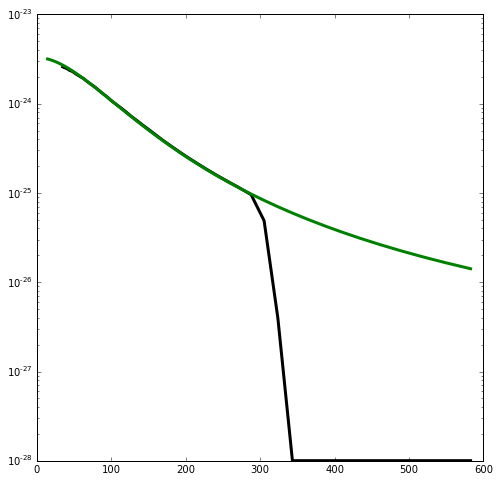

In [46]:
burkert_anal_density = prof.Burkert_isothermal_gas(burkert_r.convert_to_units('cm').value, burkert_ic.ic['r_s'], burkert_ic.ic['M200'],
                                          burkert_ic.ic['T_dwarf'], burkert_ic.ic['n_o'])

fig, ax = plt.subplots(1)
ax.plot(burkert_r.convert_to_units('pc').value, burkert_rho.value, lw=3, color = 'black', label='Burkert - Sim')
ax.plot(burkert_r.convert_to_units('pc').value, burkert_anal_density, lw=3, color = 'green', label='Burkert - Sim')
ax.semilogy()

fig.set_size_inches(8,8)

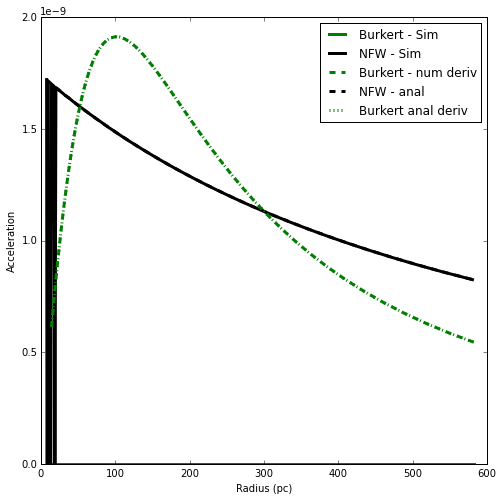

In [63]:
# plot
fig, ax = plt.subplots(1)

burkert_r = burkert_r.convert_to_units('pc')
NFW_r = NFW_r.convert_to_units('pc')

ax.plot(burkert_r.value, burkert_g.value, lw=3, color = 'green', label='Burkert - Sim')
ax.plot(NFW_r.value, NFW_g.value, lw=3, color = 'black', label='NFW - Sim')

ax.plot(burkert_r.value, burkert_acc_anal, lw=3, color= 'green', label = "Burkert - num deriv", ls = '--')
ax.plot(NFW_r.value, NFW_acc_anal, lw=3, color ='black', label = 'NFW - anal', ls = '--')

ax.plot(burkert_r.value, b_g, lw=3, color= 'green', label = "Burkert anal deriv", ls = ':')


ax.legend(loc='best')

ax.set_xlabel('Radius (pc)')
ax.set_ylabel('Acceleration')
fig.set_size_inches(8,8)

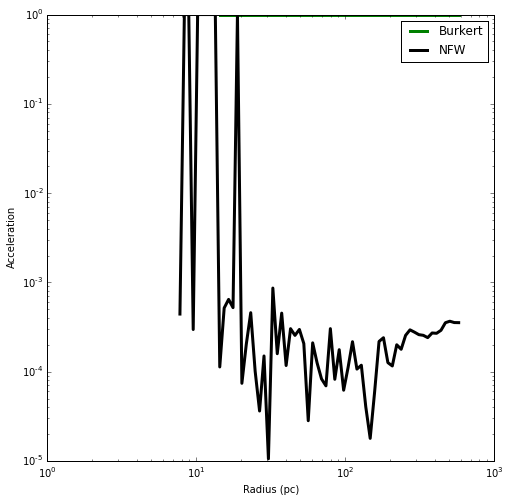

In [48]:
# plot
fig, ax = plt.subplots(1)

burkert_r = burkert_r.convert_to_units('pc')
NFW_r = NFW_r.convert_to_units('pc')

burkert_error = np.abs((burkert_g.value - burkert_acc_anal) / burkert_acc_anal)
NFW_error     = np.abs((NFW_g.value - NFW_acc_anal) / NFW_acc_anal)

ax.plot(burkert_r.value, burkert_error, lw=3, color = 'green', label='Burkert')
ax.plot(NFW_r.value, NFW_error, lw=3, color = 'black', label='NFW')

ax.loglog()

ax.legend(loc='best')

ax.set_xlabel('Radius (pc)')
ax.set_ylabel('Acceleration')
fig.set_size_inches(8,8)

In [49]:
rho_crit = 9.74000000E-30

M200_B  = burkert_ic.ic['M200']
M200_NFW = NFW_ic.ic['M200']
R200_B = (3.0*M200_B/(4.0*np.pi*200.0*rho_crit))**(1.0/3.0)
R200_NFW = (3.0*M200_NFW/(4.0*np.pi*200.0*rho_crit))**(1.0/3.0)

print "%4.4E %4.4E"%(M200_B / cgs.Msun, M200_NFW/cgs.Msun)
print "%4.4E %4.4E"%(R200_B / cgs.kpc, R200_NFW/cgs.kpc)

4.1026E+07 3.0934E+08
6.9822E+00 1.3692E+01


In [50]:
burkert_ic.FLASH_readable_ic()


sim_rho_crit       = 9.74000000E-30
sim_TCloud         = 6.00000000E+03
sim_rhoCenter      = 3.28671413E-24
sim_mu_halo        = 6.00000000E-01
sim_TAmbient       = 2.37479862E+06
sim_M200           = 8.16039699E+40
sim_bparam         = 3.25301079E+20
sim_rhoAmbient     = 1.00357200E-28
sim_mu_dwarf       = 1.31000000E+00


In [51]:
print burkert_ic.ic['n_o'], burkert_ic.ic['n_o'] * cgs.mp * burkert_ic.ic['mu_dwarf']

1.50000722502 3.28671413098e-24


In [52]:
Burkert_dens = profile['density']

In [53]:
anal_dens = prof.Burkert_isothermal_gas( burkert_r.convert_to_units('cm').value , burkert_ic.ic['r_s'], burkert_ic.ic['M200'], burkert_ic.ic['T_dwarf'], burkert_ic.ic['n_o'])

[Bukert isothermal gas] 5.51134756867e-23 3.28671413098e-24 8.16039699195e+40 2.15449045847e+22


[]

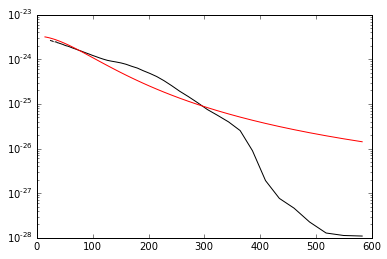

In [54]:
burkert_r = burkert_r.convert_to_units('pc')

plt.plot(burkert_r.value, Burkert_dens.value, color='black')
plt.plot(burkert_r.value, anal_dens, color='red')
plt.semilogy()

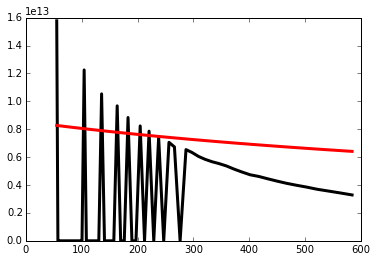

In [55]:
ds_particle = yt.load("/home/emerick/Research/dwarfs/flash_runs/dm_test/dwarf_fullp_hdf5_plt_cnt_0001")

source = ds_particle.sphere( np.array([1.0,1.0,1.0])*yt.units.kpc, (600, 'pc'))
profile = yt.create_profile(source, 'radius', ['gpot'], weight_field = 'cell_volume') 
nfw_particle_r = profile.x.convert_to_units('cm')
nfw_particle_gpot = profile['gpot']

# now compute the analytic case
NFW_analytic_pot = NFW_pot(nfw_particle_r.convert_to_units('cm').value)

plt.plot( nfw_particle_r.convert_to_units('pc').value, - nfw_particle_gpot.value/10000.0,lw=3,color='black')
plt.plot( nfw_particle_r.convert_to_units('pc').value, - NFW_analytic_pot,lw=3,color='red')

#plt.semilogy()


In [56]:

rho_edge = prof.Burkert_isothermal_gas(burkert_ic.ic['r_HI'], burkert_ic.ic['r_s'], burkert_ic.ic['M200'],
                                          burkert_ic.ic['T_dwarf'], burkert_ic.ic['n_o'])


P_edge   = rho_edge * burkert_ic.ic['T_dwarf'] * cgs.kb / (burkert_ic.ic['mu_dwarf'] * cgs.mp)
P_corona = burkert_ic.ic['n_halo'] * burkert_ic.ic['T_halo'] * cgs.kb

print P_edge, P_corona

[Bukert isothermal gas] 5.51134756867e-23 3.28671413098e-24 8.16039699195e+40 2.15449045847e+22
3.27876571512e-14 3.27876571512e-14
